In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [33]:
SN_df = pd.read_csv('Social_Network_Ads.csv')

X = SN_df.iloc[:, [2, 3]].values
y = SN_df.iloc[:, 4].values

SN_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Feature Scaling**

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X_train,X_test

(array([[ 0.58164944, -0.88670699],
        [-0.60673761,  1.46173768],
        [-0.01254409, -0.5677824 ],
        [-0.60673761,  1.89663484],
        [ 1.37390747, -1.40858358],
        [ 1.47293972,  0.99784738],
        [ 0.08648817, -0.79972756],
        [-0.01254409, -0.24885782],
        [-0.21060859, -0.5677824 ],
        [-0.21060859, -0.19087153],
        [-0.30964085, -1.29261101],
        [-0.30964085, -0.5677824 ],
        [ 0.38358493,  0.09905991],
        [ 0.8787462 , -0.59677555],
        [ 2.06713324, -1.17663843],
        [ 1.07681071, -0.13288524],
        [ 0.68068169,  1.78066227],
        [-0.70576986,  0.56295021],
        [ 0.77971394,  0.35999821],
        [ 0.8787462 , -0.53878926],
        [-1.20093113, -1.58254245],
        [ 2.1661655 ,  0.93986109],
        [-0.01254409,  1.22979253],
        [ 0.18552042,  1.08482681],
        [ 0.38358493, -0.48080297],
        [-0.30964085, -0.30684411],
        [ 0.97777845, -0.8287207 ],
        [ 0.97777845,  1.867

**Fitting Decision Tree Classification to the Training set**

In [36]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [37]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

**Making the Confusion Matrix**

Text(69.0, 0.5, 'Actual')

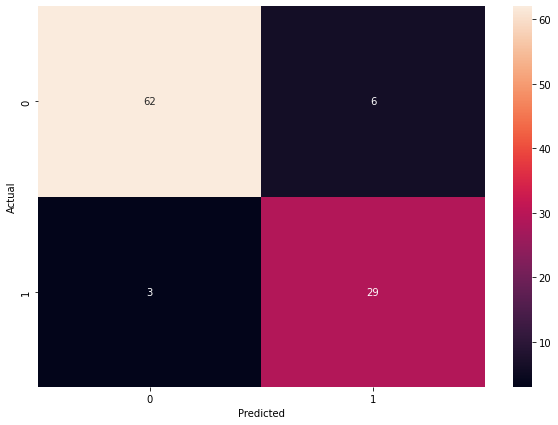

In [45]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(CM,annot=True)

plt.xlabel("Predicted")
plt.ylabel("Actual")

**Visualising the Training set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


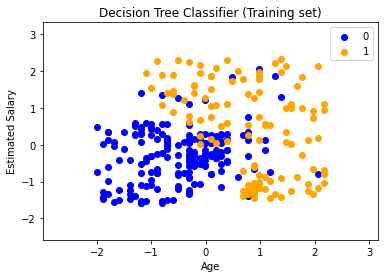

In [43]:
# Visualizing trainning data set

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange'))(i), label = j)
    
plt.title('Decision Tree Classifier--Training set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


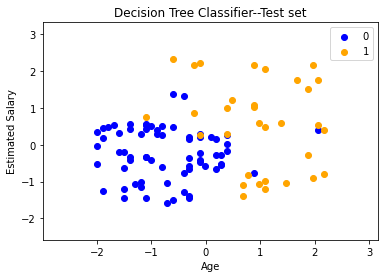

In [44]:
# Visualizing test data set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange'))(i), label = j)
    
plt.title('Decision Tree Classifier--Test set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()